$$ 
max\ 2x_1 + 3x_2 \\
s.t.\ 3x_1^2 + 4x_2 <= 10 \\
x_1, x_2 >0
$$ 

# 1. Import libraries

In [59]:
import itertools 

import pyomo.environ as pe
import matplotlib.pyplot as plt
import numpy as np

# 2. Visualise simple problem

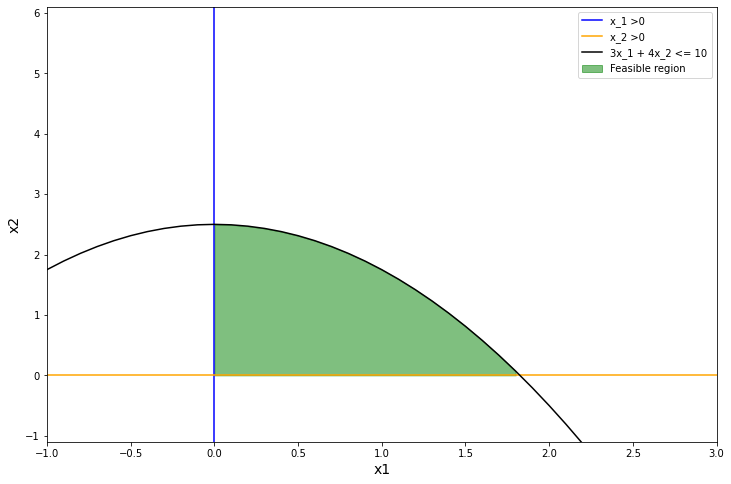

In [61]:
plt.figure(figsize=(12, 8))

# draw constraints
# 𝑥1,𝑥2>0
plt.axvline(x=0, c="blue", label="x_1 >0")
plt.axhline(y=0, c="orange", label="x_2 >0")

# constraint 3𝑥_1 * 𝑥_2 <=10
x1 = np.arange(-1, 3, 0.1)
x2 = [(10-3*x**2)/4 for x in x1]
plt.plot(x1, x2, c="black", label="3x_1 + 4x_2 <= 10")

# traingle of possible solutions
plt.fill_between(x1, x2, 0, where=((x1>=-0.0001) & (x1<=np.sqrt(10/3))), 
                 color="green", alpha=0.5, label="Feasible region")

# plot config
plt.xlim(-1, 3)
plt.ylim(-1.1, 6.1)
plt.xlabel("x1", size=14)
plt.ylabel("x2", size=14)
plt.legend()
plt.show()

# 3. Formulate problem

## 3.1 Define model, objective and constraints

In [62]:
# instantiate a concrete model
model = pe.ConcreteModel()

# define sets
model.dims = pe.Set(initialize=[1, 2], domain=pe.NonNegativeReals)

# create variables (the ones we want to find a solution for)
model.x = pe.Var(model.dims, domain=pe.NonNegativeIntegers)

# define objective
model.OBJ = pe.Objective(expr=2*model.x[1] + 3*model.x[2], sense=pe.maximize)

# define constraints
model.Constraint1 = pe.Constraint(expr=3*model.x[1]**2 + 4*model.x[2] <= 10)

In [63]:
print("Defined model")
print("=" * 20)
model.pprint()

Defined model
1 Set Declarations
    dims : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain           : Size : Members
        None :     1 : NonNegativeReals :    2 : {1, 2}

1 Var Declarations
    x : Size=2, Index=dims
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :  None :  None : False :  True : NonNegativeIntegers
          2 :     0 :  None :  None : False :  True : NonNegativeIntegers

1 Objective Declarations
    OBJ : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 2*x[1] + 3*x[2]

1 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body               : Upper : Active
        None :  -Inf : 3*x[1]**2 + 4*x[2] :  10.0 :   True

4 Declarations: dims x OBJ Constraint1


## 3.2 Solve model

In [65]:
pe.SolverFactory("ipopt").solve(model)

{'Problem': [{'Lower bound': -inf, 'Upper bound': inf, 'Number of objectives': 1, 'Number of constraints': 1, 'Number of variables': 2, 'Sense': 'unknown'}], 'Solver': [{'Status': 'ok', 'Message': 'Ipopt 3.14.7\\x3a Optimal Solution Found', 'Termination condition': 'optimal', 'Id': 0, 'Error rc': 0, 'Time': 0.027959823608398438}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [66]:
print("\n")
print("Solution")
print("="*20)
model.x.display()



Solution
x : Size=2, Index=dims
    Key : Lower : Value              : Upper : Fixed : Stale : Domain
      1 :     0 : 0.4444444455415329 :  None : False : False : NonNegativeIntegers
      2 :     0 : 2.3518518752855013 :  None : False : False : NonNegativeIntegers


# 4. Visualise solution

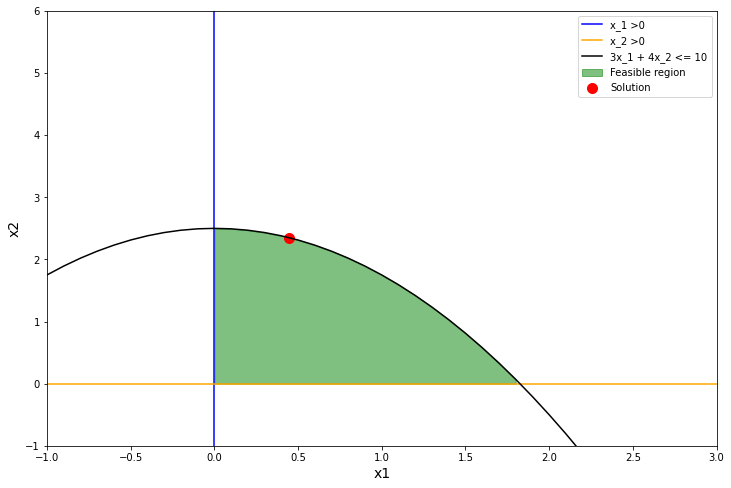

In [67]:
plt.figure(figsize=(12, 8))

# draw constraints
# 𝑥1,𝑥2>0
plt.axvline(x=0, c="blue", label="x_1 >0")
plt.axhline(y=0, c="orange", label="x_2 >0")

# constraint 3𝑥_1 * 𝑥_2 <=10
x1 = np.arange(-1, 3, 0.1)
x2 = [(10-3*x**2)/4 for x in x1]
plt.plot(x1, x2, c="black", label="3x_1 + 4x_2 <= 10")

# traingle of possible solutions
plt.fill_between(x1, x2, 0, where=((x1>=-0.0001) & (x1<=np.sqrt(10/3))), 
                 color="green", alpha=0.5, label="Feasible region")

# plot solution
plt.scatter(x=pe.value(model.x[1]), y=pe.value(model.x[2]), c="red", s=100, label="Solution")

# plot config
plt.xlim(-1, 3)
plt.ylim(-1, 6)
plt.xlabel("x1", size=14)
plt.ylabel("x2", size=14)
plt.legend()
plt.show()